In [ ]:
import kagglehub
jrobischon_wikipedia_movie_plots_path = kagglehub.dataset_download('jrobischon/wikipedia-movie-plots')
print(jrobischon_wikipedia_movie_plots_path)
print('Data source import complete.')


100%|██████████| 29.9M/29.9M [00:00<00:00, 48.9MB/s]

Extracting files...


/root/.cache/kagglehub/datasets/jrobischon/wikipedia-movie-plots/versions/1
Data source import complete.


<h1 style="font-size: 70px;text-align: center; font-family:Copperplate; color: darkblue">Movie Genre Classification</h1>


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report

In [ ]:
df = pd.read_csv(f"{jrobischon_wikipedia_movie_plots_path}/wiki_movie_plots_deduped.csv")
df.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


Starting model comparison for movie genre prediction...
Loading dataset...
Dataset shape: (34886, 8)

Missing values:
Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

Dataset shape after removing missing values: (34886, 8)

Dataset shape after removing unknown genres: (28803, 9)

Genre distribution:
PrimaryGenre
drama              6669
comedy             5042
action             1568
horror             1281
romance            1092
thriller           1028
western             899
crime               639
adventure           585
musical             509
romantic comedy     473
crime drama         469
science fiction     448
film noir           345
mystery             339
Name: count, dtype: int64

Dataset shape after filtering for genres with at least 100 examples: (24092, 9)

Genre encoding mappings:
action -> 0
adventure -> 1
a

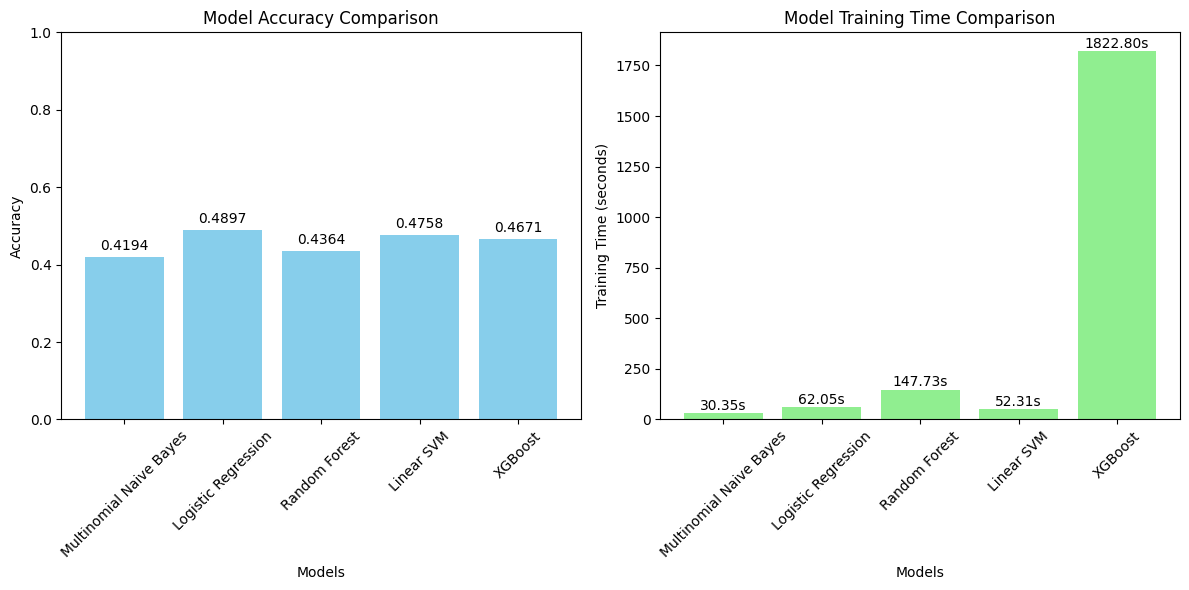


Best model based on accuracy: Logistic Regression with accuracy 0.4897


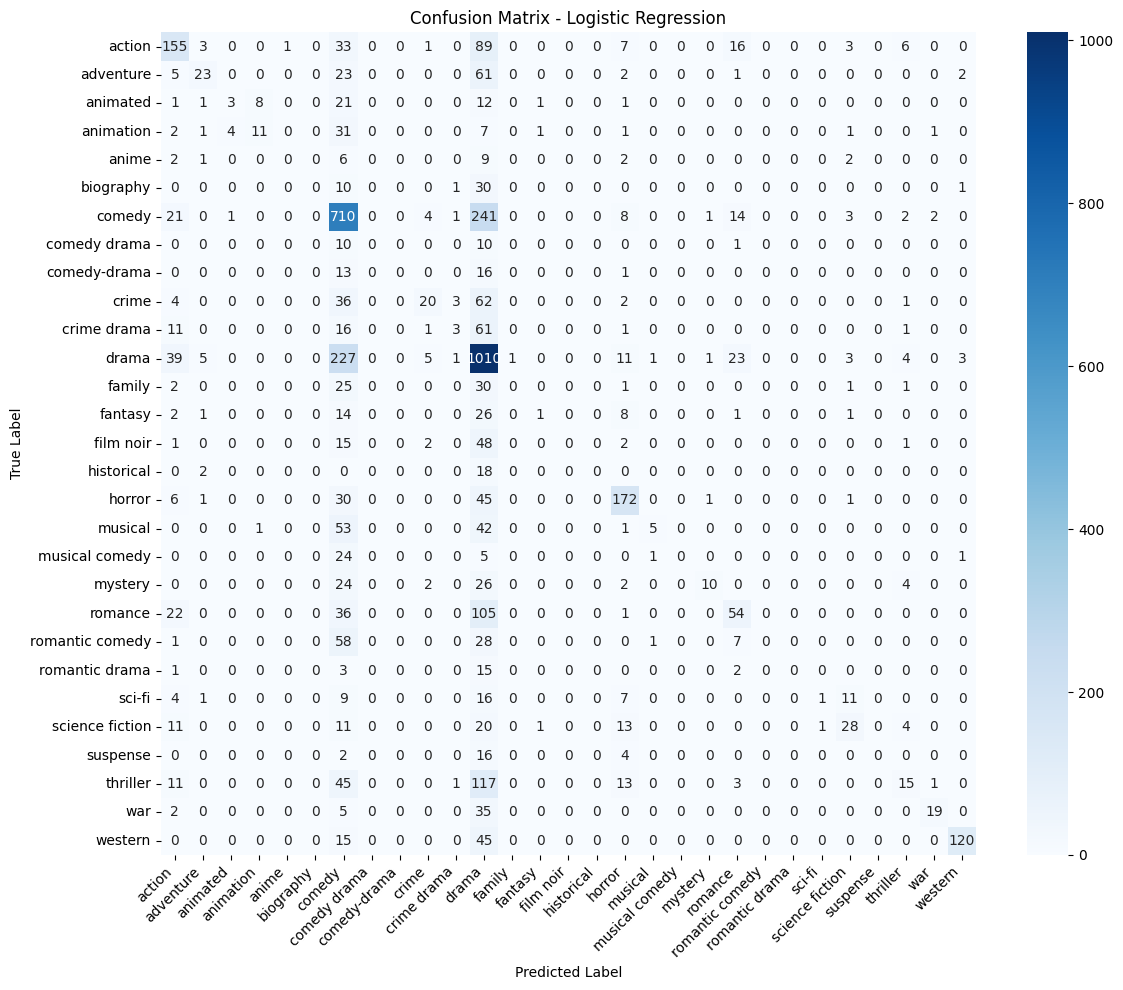


Classification Report for Best Model:
                 precision    recall  f1-score   support

         action       0.51      0.49      0.50       314
      adventure       0.59      0.20      0.29       117
       animated       0.38      0.06      0.11        48
      animation       0.55      0.18      0.28        60
          anime       0.00      0.00      0.00        22
      biography       0.00      0.00      0.00        42
         comedy       0.47      0.70      0.57      1008
   comedy drama       0.00      0.00      0.00        21
   comedy-drama       0.00      0.00      0.00        30
          crime       0.57      0.16      0.25       128
    crime drama       0.30      0.03      0.06        94
          drama       0.45      0.76      0.56      1334
         family       0.00      0.00      0.00        60
        fantasy       0.25      0.02      0.03        54
      film noir       0.00      0.00      0.00        69
     historical       0.00      0.00      0.00  

In [ ]:
# movie_plot_model_comparison.py

# movie_plot_model_comparison.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

def load_and_preprocess_data(filepath):
    print("Loading dataset...")
    df = pd.read_csv(filepath)

    print(f"Dataset shape: {df.shape}")
    print("\nMissing values:")
    print(df.isnull().sum())

    # Remove rows with missing critical fields
    df = df.dropna(subset=['Plot', 'Genre', 'Director', 'Title', 'Origin/Ethnicity'])
    print(f"\nDataset shape after removing missing values: {df.shape}")

    # Extract primary genre
    df['PrimaryGenre'] = df['Genre'].apply(lambda x: x.split(',')[0].strip())

    # Remove 'unknown' genres
    df = df[~df['PrimaryGenre'].str.lower().str.contains('unknown')]
    print(f"\nDataset shape after removing unknown genres: {df.shape}")

    # Filter genres with at least 100 examples
    genre_counts = df['PrimaryGenre'].value_counts()
    print("\nGenre distribution:")
    print(genre_counts.head(15))

    min_examples = 100
    valid_genres = genre_counts[genre_counts >= min_examples].index
    df_filtered = df[df['PrimaryGenre'].isin(valid_genres)].copy()
    print(f"\nDataset shape after filtering for genres with at least {min_examples} examples: {df_filtered.shape}")

    # Combine more text features for better TF-IDF signal
    df_filtered['CombinedText'] = (
        df_filtered['Title'] + ": " +
        df_filtered['Plot'] + " Directed by " +
        df_filtered['Director'] + ". Origin: " +
        df_filtered['Origin/Ethnicity']
    )

    # Encode labels
    label_encoder = LabelEncoder()
    df_filtered['GenreEncoded'] = label_encoder.fit_transform(df_filtered['PrimaryGenre'])

    joblib.dump(label_encoder, 'genre_label_encoder.pkl')

    print("\nGenre encoding mappings:")
    for i, genre in enumerate(label_encoder.classes_):
        print(f"{genre} -> {i}")

    return df_filtered


def prepare_features_and_labels(df):
    X = df['CombinedText']
    y = df['GenreEncoded']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    print(f"\nTraining set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")

    return X_train, X_test, y_train, y_test

############################################################################################.


def train_and_evaluate_models(X_train, X_test, y_train, y_test, label_encoder):

    models = {
        'Multinomial Naive Bayes': MultinomialNB(),
        'Logistic Regression': LogisticRegression(max_iter=1000, C=1.0),
        'Random Forest': RandomForestClassifier(n_estimators=100),
        'Linear SVM': LinearSVC(C=1.0),
        'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }


    tfidf = TfidfVectorizer(
    max_features=10000,
    min_df=2,
    max_df=0.8,
    ngram_range=(1, 2),
    stop_words='english'
    )


    results = {}
    trained_models = {}

    for name, model in models.items():
        print(f"\n{'-'*50}")
        print(f"Training {name}...")
        start_time = time.time()


        pipeline = Pipeline([
            ('tfidf', tfidf),
            ('model', model)
        ])


        pipeline.fit(X_train, y_train)


        y_pred = pipeline.predict(X_test)

        train_time = time.time() - start_time

        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Training time: {train_time:.2f} seconds")

        results[name] = {
            'accuracy': accuracy,
            'training_time': train_time,
            'classification_report': report
        }

        trained_models[name] = pipeline

        joblib.dump(pipeline, f"{name.lower().replace(' ', '_')}_model.pkl")

    return results, trained_models

def compare_results(results):
    model_names = list(results.keys())
    accuracies = [results[name]['accuracy'] for name in model_names]
    training_times = [results[name]['training_time'] for name in model_names]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    bars = plt.bar(model_names, accuracies, color='skyblue')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.0)

    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                 f'{accuracy:.4f}', ha='center', va='bottom')

    plt.subplot(1, 2, 2)
    bars = plt.bar(model_names, training_times, color='lightgreen')
    plt.title('Model Training Time Comparison')
    plt.xlabel('Models')
    plt.ylabel('Training Time (seconds)')
    plt.xticks(rotation=45)

    for bar, time_val in zip(bars, training_times):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 f'{time_val:.2f}s', ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()

    best_model = model_names[np.argmax(accuracies)]
    print(f"\nBest model based on accuracy: {best_model} with accuracy {max(accuracies):.4f}")

    return best_model

def analyze_best_model(best_model_name, trained_models, X_test, y_test, label_encoder):
    best_model = trained_models[best_model_name]

    y_pred = best_model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

    print("\nClassification Report for Best Model:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    return best_model

def predict_with_best_model(best_model, sample_plots, label_encoder):
    print("\nPredicting genres for sample plots:")
    predictions = best_model.predict(sample_plots)

    for i, (plot, pred) in enumerate(zip(sample_plots, predictions)):
        genre = label_encoder.inverse_transform([pred])[0]
        plot_snippet = plot[:100] + "..." if len(plot) > 100 else plot
        print(f"\nSample {i+1}: {plot_snippet}")
        print(f"Predicted genre: {genre}")

    return predictions

def main(filepath):
    print("Starting model comparison for movie genre prediction...")

    df = load_and_preprocess_data(filepath)

    X_train, X_test, y_train, y_test = prepare_features_and_labels(df)

    label_encoder = joblib.load('genre_label_encoder.pkl')

    results, trained_models = train_and_evaluate_models(X_train, X_test, y_train, y_test, label_encoder)

    best_model_name = compare_results(results)
    best_model = analyze_best_model(best_model_name, trained_models, X_test, y_test, label_encoder)

    sample_plots = [
        "A young wizard discovers he has magical powers and is sent to a special school where he learns to use his abilities.",
        "In a post-apocalyptic world, survivors battle against zombie hordes while searching for a safe haven.",
        "Two detectives track a serial killer who chooses his victims based on the seven deadly sins."
    ]
    predict_with_best_model(best_model, sample_plots, label_encoder)

    print("\nModel comparison completed successfully.")
    print(f"Best model: {best_model_name}")
    print(f"Model and encoder saved as '{best_model_name.lower().replace(' ', '_')}_model.pkl' and 'genre_label_encoder.pkl'")

    return best_model_name, best_model

if __name__ == "__main__":
    filepath = f"{jrobischon_wikipedia_movie_plots_path}/wiki_movie_plots_deduped.csv"
    main(filepath)